<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она работает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров другого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('train.csv', na_values = ' ') # пришлось добавить na_values аргумент, иначе не видел пропуски

In [4]:
data.shape

(5282, 20)

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
# 1 пункт (смотрим на случайные 5 строк)
data.sample(5, random_state = 42)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1448,9,45.40,418.80,Male,0,No,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
4792,37,70.35,2552.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,0
8,50,105.95,5341.80,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
3964,44,100.10,4378.35,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),0
240,25,20.95,495.15,Male,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),0


In [7]:
# 2 пункт (смотрим на типы столбцов и проверяем наличие пропусков)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [8]:
data.loc[(pd.isna(data)).sum(axis = 1) > 0, :]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


Пропусков в данных всего 9, на фоне свыше 5000 наблюдений количество не кажется таким внушительным (тем более, что принадлежат нулевому классу), поэтому просто дропним их, чтобы не мешались.

In [9]:
data.dropna(inplace = True)

## Анализ данных (3 балла)

1) Для численных признаков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

### Пункт 1 (сразу используем seaborn для визуализации)
### Численные признаки

In [10]:
import seaborn as sns
plt.style.use('ggplot')

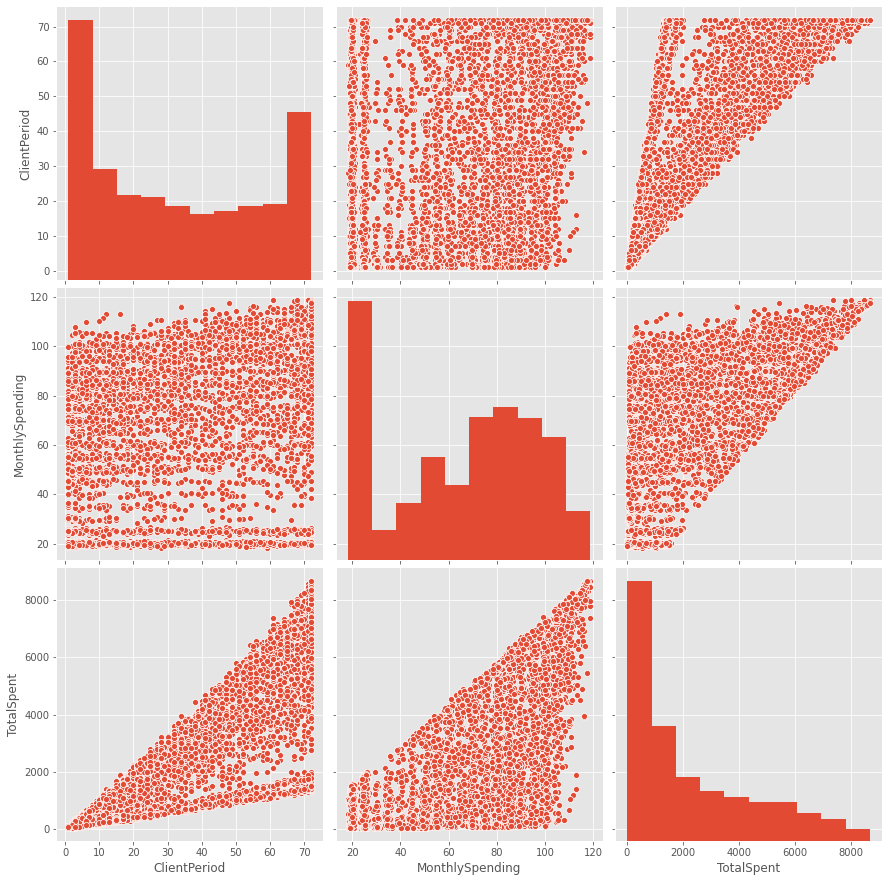

In [11]:
g = sns.pairplot(data.loc[:, num_cols], height = 5)
g.fig.set_size_inches(12, 12)
plt.show()

### Категориальные признаки

In [12]:
for i in cat_cols:
    x = data[i].value_counts()
    print(f'Column name is: {i}, and its values: \n{x}')
    print()

Column name is: Sex, and its values: 
Male      2651
Female    2622
Name: Sex, dtype: int64

Column name is: IsSeniorCitizen, and its values: 
0    4431
1     842
Name: IsSeniorCitizen, dtype: int64

Column name is: HasPartner, and its values: 
No     2704
Yes    2569
Name: HasPartner, dtype: int64

Column name is: HasChild, and its values: 
No     3676
Yes    1597
Name: HasChild, dtype: int64

Column name is: HasPhoneService, and its values: 
Yes    4754
No      519
Name: HasPhoneService, dtype: int64

Column name is: HasMultiplePhoneNumbers, and its values: 
No                  2508
Yes                 2246
No phone service     519
Name: HasMultiplePhoneNumbers, dtype: int64

Column name is: HasInternetService, and its values: 
Fiber optic    2341
DSL            1795
No             1137
Name: HasInternetService, dtype: int64

Column name is: HasOnlineSecurityService, and its values: 
No                     2611
Yes                    1525
No internet service    1137
Name: HasOnlineSe

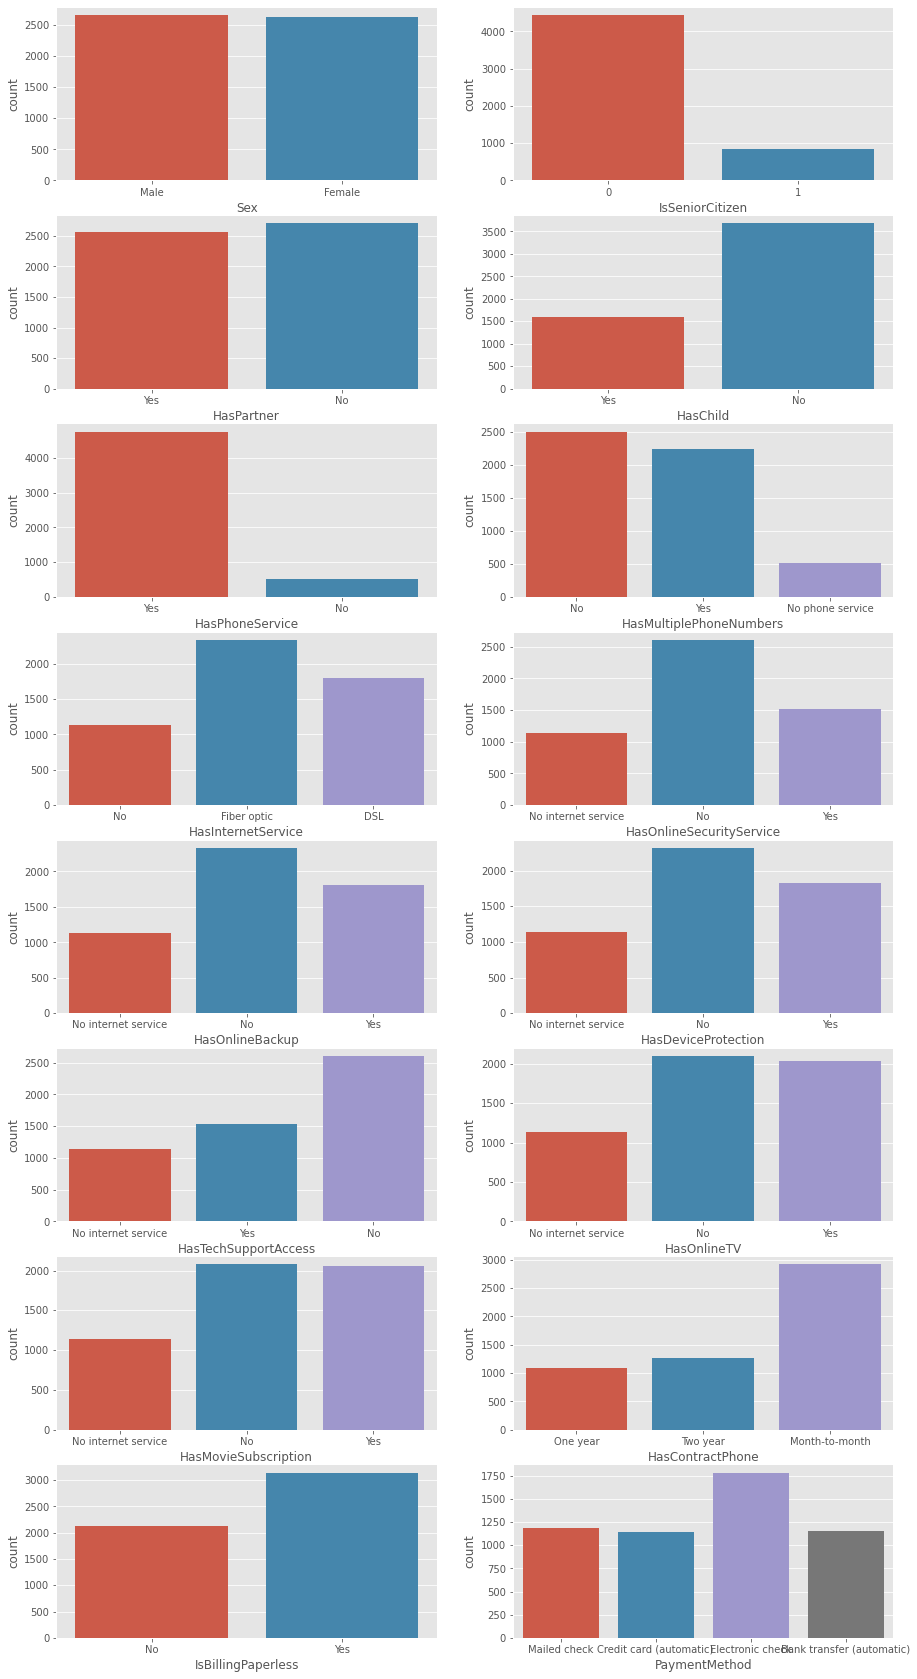

In [13]:
fig, ax = plt.subplots(len(cat_cols) // 2, 2, figsize = (15, 30))
for i, col in enumerate(data.loc[:, cat_cols].columns):
    sns.countplot(data[col], ax = ax[i // 2, i % 2])

plt.show()

### Пункт 2 (распределение целевой переменной)

<AxesSubplot:xlabel='Churn', ylabel='count'>

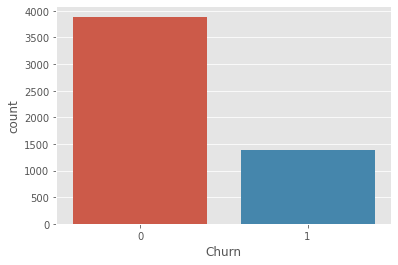

In [14]:
sns.countplot(data.Churn)

#### Дисбаланс классов есть, но не такой катострофичный, как могло бы быть.

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scoring='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа превращаем в one-hot вектора.)

In [16]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from scipy import sparse

### Разделение на train/valid

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='Churn'), data['Churn'], 
                                                    stratify = data['Churn'], test_size = 0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4218, 19), (4218,), (1055, 19), (1055,))

### Пункт 1

In [18]:
# стандартизируем числовые
scaler = StandardScaler()
X_num_train = scaler.fit_transform(X_train.loc[:, num_cols])
X_num_test = scaler.transform(X_test.loc[:, num_cols])

# закодируем категориальные с помощью OHE
drop_enc = OneHotEncoder(drop = 'first')
X_cat_train = drop_enc.fit_transform(X_train.loc[:, cat_cols])
X_cat_test = drop_enc.transform(X_test.loc[:, cat_cols])

# соединяем
X_train_prepared = sparse.hstack([X_num_train, X_cat_train]).toarray()
X_test_prepared = sparse.hstack([X_num_test, X_cat_test]).toarray()

X_train_prepared.shape, X_test_prepared.shape

((4218, 30), (1055, 30))

### Пункт 2

Проверим 50 значений параметра С сначала с параметром class_weight = None, потом с class_weight = 'balanced'

In [19]:
clf_logit_1 = LogisticRegressionCV(Cs = 50, scoring = 'roc_auc', cv = 10, class_weight = None)

In [20]:
clf_logit_1.fit(X_train_prepared, y_train)
print(f'Train: {roc_auc_score(y_score = clf_logit_1.predict_proba(X_train_prepared)[:, 1], y_true = y_train)}')
print(f'Test: {roc_auc_score(y_score = clf_logit_1.predict_proba(X_test_prepared)[:, 1], y_true = y_test)}')

Train: 0.850653493141596
Test: 0.838937198964298


In [33]:
clf_logit_1.C_

array([5.42867544])

In [21]:
clf_logit_2 = LogisticRegressionCV(Cs = 50, scoring = 'roc_auc', cv = 10, class_weight = 'balanced')

In [22]:
clf_logit_2.fit(X_train_prepared, y_train)
print(f'Train: {roc_auc_score(y_score = clf_logit_2.predict_proba(X_train_prepared)[:, 1], y_true = y_train)}')
print(f'Test: {roc_auc_score(y_score = clf_logit_2.predict_proba(X_test_prepared)[:, 1], y_true = y_test)}')

Train: 0.8505344412706959
Test: 0.8385288576652158


In [23]:
clf_logit_2.C_

array([3.72759372])

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

#### Итог: наилучшее качество на тесте вышло при С = 5.42867544, class_weight = None (Test: 0.838937198964298)

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [27]:
from catboost import CatBoostClassifier

### Пункт 1 (разделение на train/valid уже сделано выше)

In [34]:
clf_cat_default = CatBoostClassifier(allow_writing_files = False, verbose = False, cat_features = cat_cols)
clf_cat_default.fit(X_train, y_train)
print(f'Train: {roc_auc_score(y_score = clf_cat_default.predict_proba(X_train)[:, 1], y_true = y_train)}')
print(f'Test: {roc_auc_score(y_score = clf_cat_default.predict_proba(X_test)[:, 1], y_true = y_test)}')

Train: 0.8928530258194469
Test: 0.840069418020844


### Пункт 2

Реализация GridSearchCV с CatBoostClassifier оказалась не такой сложной, так что далее подберём параметр данным способом.

In [28]:
grid = {'learning_rate': [0.10, 0.15, 0.20],
        'depth': [3, 4, 5, 6],
        'l2_leaf_reg': [1, 3],
        'n_estimators': [100, 500]}

clf_cat = GridSearchCV(CatBoostClassifier(allow_writing_files = False, verbose = False, cat_features = cat_cols), 
                       param_grid = grid, cv = 5, scoring = 'roc_auc').fit(X_train, y_train)

In [29]:
clf_cat.best_params_
# {'depth': 3, 'l2_leaf_reg': 1, 'learning_rate': 0.15, 'n_estimators': 100}
# Train: 0.8557990021130256
# Test: 0.8645002923352482
# {'depth': 3, 'l2_leaf_reg': 1, 'learning_rate': 0.1, 'n_estimators': 100}
# Train: 0.8563576747950057
# Test: 0.8454938609597876

{'depth': 3, 'l2_leaf_reg': 1, 'learning_rate': 0.1, 'n_estimators': 100}

In [30]:
print(f'Train: {roc_auc_score(y_score = clf_cat.predict_proba(X_train)[:, 1], y_true = y_train)}')
print(f'Test: {roc_auc_score(y_score = clf_cat.predict_proba(X_test)[:, 1], y_true = y_test)}')

Train: 0.8563576747950057
Test: 0.8454938609597876


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

#### Итог:
GridSearch посчитал лучшей комбинацией считает {'depth': 3, 'l2_leaf_reg': 1, 'learning_rate': 0.1, 'n_estimators': 100}, однако лучшее качество на тесте и на кэгле показала комбинация {'depth': 3, 'l2_leaf_reg': 1, 'learning_rate': 0.15, 'n_estimators': 100}, которую я тестировал до расширенного GridSearch. Мораль: перебор бОльшего количества параметров не всегда хорошо :)))))))  от части это может быть связано со своего рода переобучением: подгонкой параметров под тренировочную выборку. Однако оба решения превосходят AUC_ROC, равный 0.84)

# Предсказания

In [31]:
best_model = clf_cat

In [32]:
X_test_final = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test_final)[:, 1] #/ best_model.predict(X_test)
submission.to_csv('./my_submission.csv', index = False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.